## Приоритезация гипотез и анализ резултатов А/В теста
### Часть 1. Приоритизация гипотез.

Откроем файл с гипотезами и изучим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_colwidth', -1)
hypothesis = pd.read_csv('C:\\datasets\hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Используем нумеровку индексов с еденицы. Применим фреймворк ICE для приоритизации гипотез. И отсортируем их по убыванию приоритета.

In [2]:
hypothesis.index = hypothesis.index +1
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)

display(hypothesis.sort_values('ICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Применим фреймворк RICE для приоритизации гипотез. так же отсортируем их по убыванию приоритета.

In [3]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['RICE'].round(2)

display(hypothesis.sort_values('RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Из данных хорошо видно, что в зависимости от используемой метрики, меняется приоритезация гипотез. Это связно с тем, что  помимо силы изменений, уверенности в изменениях и стоимости проверки гипотезы, которые учитываются в метрике ICE, метрика RICE так же включает в себя количество пользователей, которых затронут изменения. Так, например, гипеза №9, находящаяся на первом месте приорететности по метрике ICE, оказалась лишь на 5 месте по методике RICE, так как результаты проверки этой гипотезы затронут наменьшее количество пользователей.

### Часть 2. Анализ A/B-теста

Откроем файлы с результатами А/В-тестов и изучем данные

In [4]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head())
orders.info()

display(visitors.head())
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Из информации о таблицах видно, что в данных нет пропусков, количесво значений во всех столбцах совпадает с количеством строк в таблицах.

Переведем данные даты в верный формат

In [5]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим данные на наличие дубликатов

In [6]:
orders.duplicated().sum()
visitors.duplicated().sum()

0

Дубликатов в данных необнаружено.

#### 1.Изучим кумулятивную выручку по группам, построим её график.

In [7]:
datesGroups = orders[['date','group']].drop_duplicates()



Соберём агрегированные кумулятивные по дням данные о заказах

In [8]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date']
<= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' :
pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [9]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одной

In [10]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:


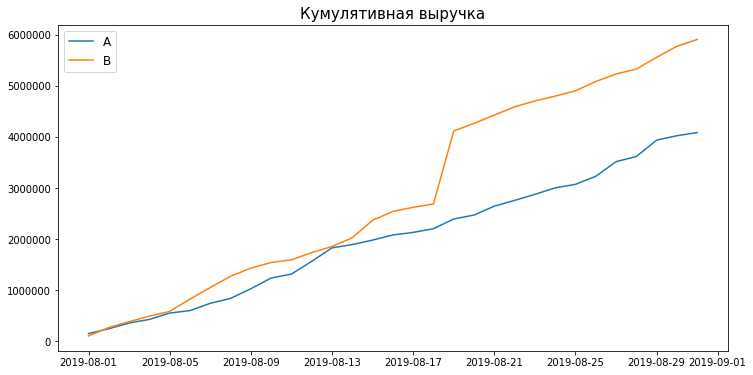

In [11]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(12,6))
plt.title('Кумулятивная выручка', fontsize=15)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend(fontsize=12)

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы B в один момент резко вырос. Это может сигнализировать о всплеске числа заказов, либо о появлении аномально дорогого заказа в выборке.

#### 2. Изучим кумулятивный средний чек по группам, постороим его график

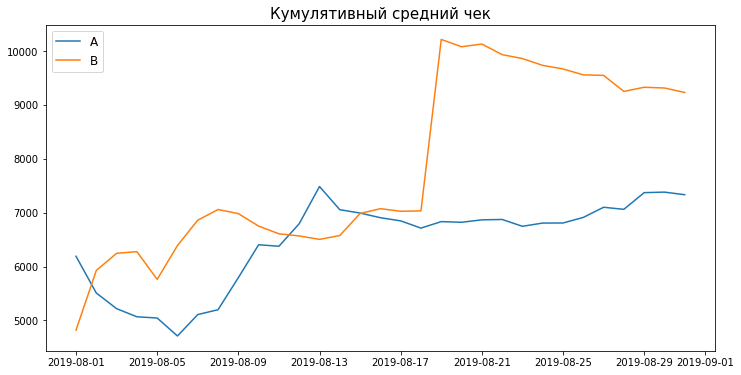

In [12]:
plt.figure(figsize=(12,6))
plt.title('Кумулятивный средний чек', fontsize=15)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(loc=2, fontsize=12)

На графике видно, что в группу B явно попал один или несколько аномально крупных заказов, по-этому судить о различиях групп пока рано, нужно больше данных, чтоб средний чек группы B пришёл к реальному значению.

#### 3. Изучим относительное изменение кумулятивного среднего чека группы В к группе А, построем его график

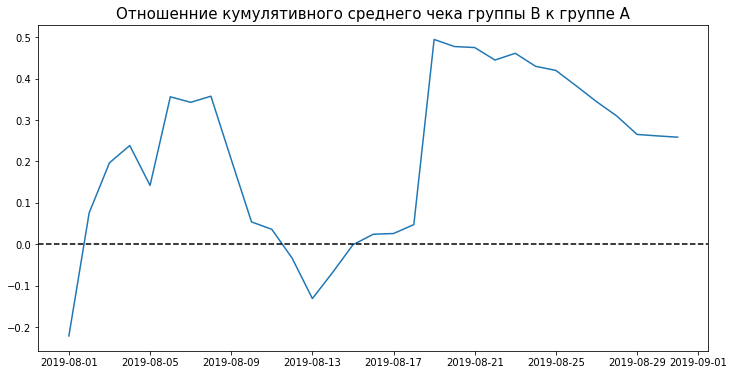

In [13]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.title('Отношенние кумулятивного среднего чека группы В к группе А', fontsize=15)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/
mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

В нескольких точках график различия между сегментами резко изменяется. В данных почти наверняка есть выбросы.

#### 4. Изучим кумулятивную конверсию по группам, построим её график

['2019-08-01', '2019-09-01', 0.025, 0.04]

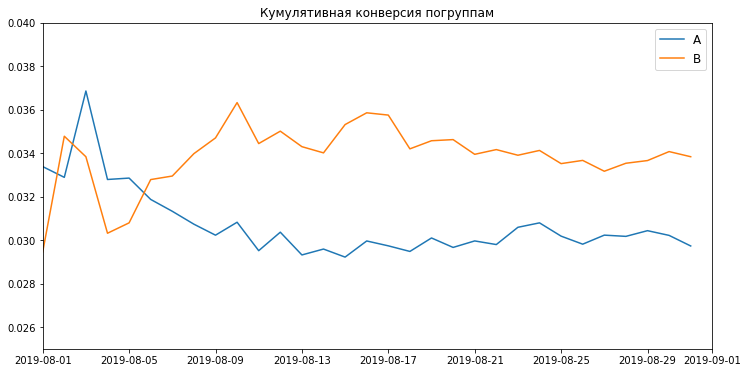

In [14]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,6))
plt.title('Кумулятивная конверсия погруппам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(fontsize=12)

plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.04])

Из графика видно, что конверсия группы В стабильно выше конверсии группы А

#### 5. Изучим относительное изменение кумулятивной конверсии группы В к группе А

['2019-08-01', '2019-09-01', -0.15, 0.25]

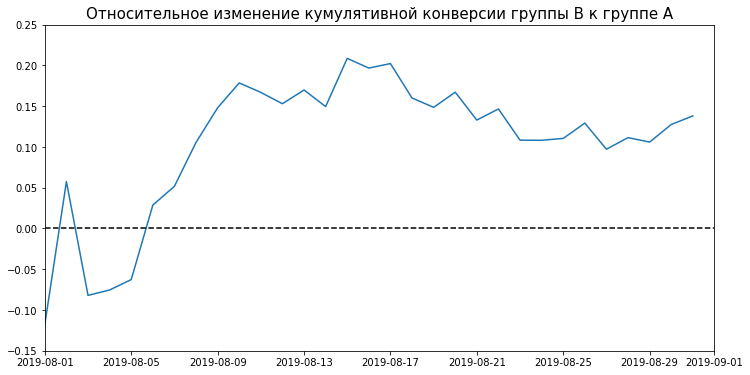

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,6))
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А', fontsize=15)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.15, 0.25]) 

Отношение конверсий пока ещё не зафиксировалось, но уже уверенно можно сказать, что конверсия группы В стабильно выше.

#### 6. Изучим количество заказов по пользователям, построим точечный график

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     


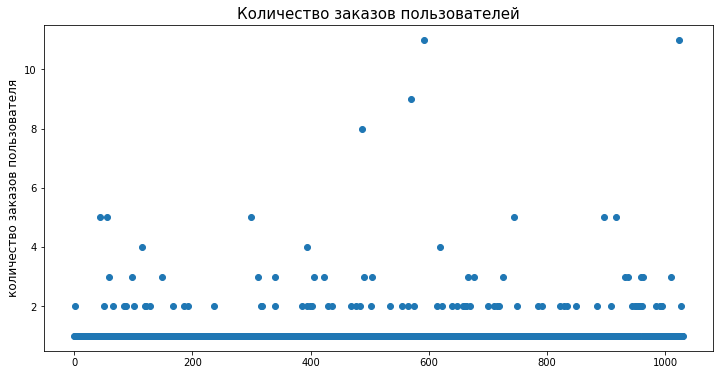

In [16]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head())

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,6))
plt.title('Количество заказов пользователей', fontsize=15)
plt.ylabel('количество заказов пользователя', fontsize=12)
plt.scatter(x_values, ordersByUsers['orders'])

Чаще всего пользователи делают только один заказ, но существует значительное число пользователей делающих 2-3 заказа за период, непонятносчитать их аномалиями или нет.

#### 7. Посчитайтаем 95-й и 99-й перцентили количества заказов на пользователя.

In [17]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не больше 5% пользователей оформили больше 2-х заказов и не больше 1% пользователей оформили более 4-х заказов. Пользователей, которые оформили больше 2-х заказов будем считать аномальными.

#### 8. Построим точечный график стоимости заказов и изучим его.


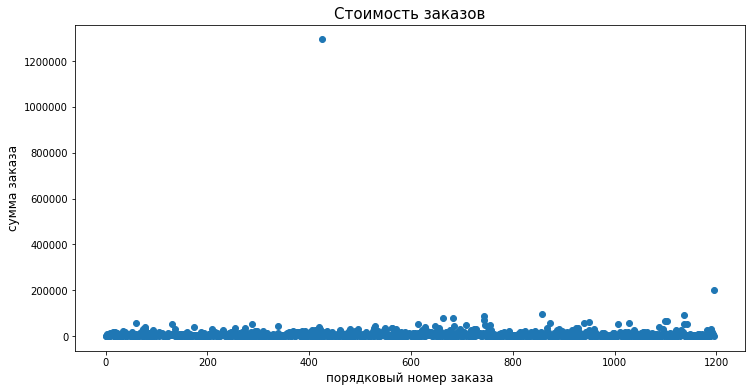

In [18]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12,6))
plt.title('Стоимость заказов', fontsize=15)
plt.xlabel('порядковый номер заказа', fontsize=12)
plt.ylabel('сумма заказа', fontsize=12)
plt.scatter(x_values, orders['revenue']) 

Здесь мы видим один анамально крупный заказ стоимостью более 1 200 000, один заказ стоимостью около 200 000 и несколько крупных заказов поменьше.

#### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов и выберите границу для определения аномальных заказов.

In [19]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233. Заказы, стоимостью больше 28 000 будем считать аномальными

#### 10. Посчитайте статистическую значимость различий конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Начнем с подготовки данных и объеденения их в таблицу data:

In [20]:
#Сохраним данные количества пользователей по дням группы А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Сохраним кумулятивные данные количества пользователей группы А на каждый день
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']
                            <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#Сохраним данные количества пользователей по дням группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Сохраним кумулятивные данные количества пользователей группы В на каждый день
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date']
                            <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#Сохраним данные количества заказов и выручки по дням группы А:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#Сохраним кумулятивные данные колличества заказов и суммы выручки на каждый день для группы А:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#Сохраним данные количества заказов и выручки по дням группы В:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#Сохраним кумулятивные данные колличества заказов и суммы выручки на каждый день для группы А:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#Объеденим данные в одной таблице:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

#print(data.head(5))

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [21]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [22]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выдвенем нулевую гипотезу: конверсии групп A и В равны. И альтернативную: конверсии групп А и В различаются.

Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой. Выведем относительный прирост конверсии группы B. Уровень статистической значимости возьмем равным 0.05.

In [23]:
print("p-value равен: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value равен: 0.008
прирост конверсии группы B: 0.138


p-value значительно меньше уровня статистической значимости. Это говорит о том, что нулевая гипотеза не получила своего подтверждения,и разница конверсий между группами статистически значима. Прирост в конверсии в группе B составляет 13.8%

#### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Выдвенем нулевую гипотезу: Средние чеки группы А и В равны. И Альтернативную: средние чеки групп А и В различаются

In [24]:
print("p-value равен: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("прирост среднего чека группы В: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value равен: 0.365
прирост среднего чека группы В: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

#### 12. Очистим данные от выбрасов и посчитаем статистическую значимость различий в конверсии между группами.

Узнаем, сколько всего аномальных пользователей:

In [25]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
#print(abnormalUsers.head(5))
print('Количество аномальных пользователей:', len(abnormalUsers)) 

Количество аномальных пользователей: 74


Подготовим выборки количества заказов по пользователям по группам теста:

In [26]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам, проверим ту же нулевую гипотезу о равенстве конверсий в группах А и В

In [27]:
print("p-value равен: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("прирост конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value равен: 0.007
прирост конверсии группы B: 0.173


p-value по-прежнему значительно меньше 0.05, разница конверсий между группами статистически значима.
Прирост в конверсии по "чистым данным" еще выше, и составляет 17.3%

#### 13.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Проверим нулевую гипотезу, о равенстве среднего чека групп А и В:

In [28]:
print("p-value равен: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("прирост среднего чека группы В: {0:.2f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value равен: 0.369
прирост среднего чека группы В: -0.02


p-value по-прежнему остается значительно выше уровня статистической значимости 0.05. А значит, причин отвергать нулевую гипотезу о равенстве групп у нас нет. При этом средний чек по "чистым данным" группы B даже на 2% ниже чем средний чек группы А, что значительно отличается от результата анализа "грязных данных". Причиной тому могут быть выбросы с большим чеком, попавшие в группу B. 

#### 14. Решение по результатам теста

Я считаю, что тест можно остановить и зафиксировать победу группы B. Мы не можем утверждать о наличии значимых различий между группами по среднему чеку покупки. Но зато более высокая конверсия в группе B очевидна, и подтвержднена тестами как на грязных данных, так и на данных без выбросов.

### Вывод:
Тест показал, что показатель конверсии группы В значительно выше группы А, благодаря чему выручка группы В выше. Средний чек покупок в группах не имеет статистически значимых отличий. Большинство пользователей совершает 1 покупку в течении месяца, есть пользователи покупающие 2 раза, большее количество покупок совершается крайне редко. Случаются заказы стоимостью несколько сотен тысяч, но большинство наших клиентов делают покупки стоимостью до 28000 рублей, и стоит ориентироваться именно на них.